In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import RobustScaler
import seaborn as sb
import pandas as pd

np.random.seed(42)

from ml_modul import MlHandler

In [2]:
ml_handler = MlHandler(pd.read_csv('Consumo_cerveja.csv', parse_dates = ['Data']))

In [3]:
ml_handler.drop_na(columns=['Data'], inplace=True)
ml_handler.source.columns = ["date", "avgTemp", "minTemp", "maxTemp", "rain", "weekend", "litres"]

season = ['Winter', 'Spring', 'Summer', 'Autumn']

winter = []
spring = []
summer = []
autumn = []

for _,i in ml_handler.source.iterrows():
    winter.append(int(i.date.month in [12,1,2]))
    spring.append(int(i.date.month in [3,4,5]))
    summer.append(int(i.date.month in [6,7,8]))
    autumn.append(int(i.date.month in [9,10,11]))
ml_handler.source['Winter'] = winter
ml_handler.source['Spring'] = spring
ml_handler.source['Summer'] = summer
ml_handler.source['Autumn'] = autumn
del ml_handler.source['date']


In [4]:
ml_handler.source.litres = ml_handler.source.litres.astype("float")

In [5]:
ml_handler.source.corr()

,avgTemp,minTemp,maxTemp,rain,weekend,litres,Winter,Spring,Summer,Autumn
avgTemp,1.000000,0.862752,0.922513,0.024416,-0.050803,0.573881,0.520459,-0.127212,-0.475517,0.086390
minTemp,0.862752,1.000000,0.672929,0.098625,-0.059534,0.388986,0.572683,0.001015,-0.631027,0.061741
maxTemp,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.641233,0.429267,-0.169270,-0.333771,0.077193
rain,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.191566,0.143315,0.006820,-0.183738,0.034777
weekend,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.507127,-0.009067,0.010992,-0.002987,0.000999
litres,0.573881,0.388986,0.641233,-0.191566,0.507127,1.000000,0.227503,-0.165197,-0.176994,0.119129
Winter,0.520459,0.572683,0.429267,0.143315,-0.009067,0.227503,1.000000,-0.332099,-0.332099,-0.329686
Spring,-0.127212,0.001015,-0.169270,0.006820,0.010992,-0.165197,-0.332099,1.000000,-0.336996,-0.334548
Summer,-0.475517,-0.631027,-0.333771,-0.183738,-0.002987,-0.176994,-0.332099,-0.336996,1.000000,-0.334548
Autumn,0.086390,0.061741,0.077193,0.034777,0.000999,0.119129,-0.329686,-0.334548,-0.334548,1.000000


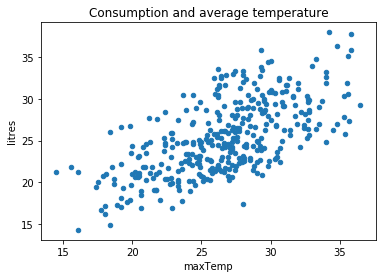

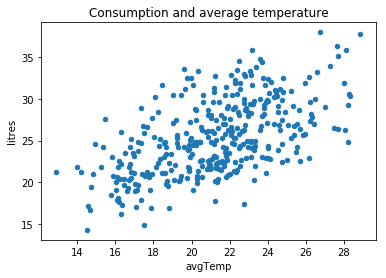

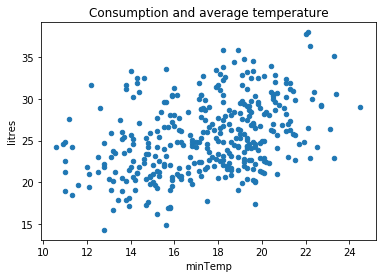

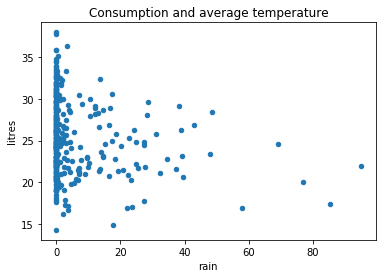

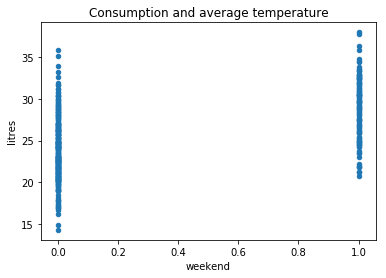

In [6]:
display(ml_handler.source.plot(kind='scatter', x="maxTemp", y="litres", title = "Consumption and average temperature"))
display(ml_handler.source.plot(kind='scatter', x="avgTemp", y="litres", title = "Consumption and average temperature"))
display(ml_handler.source.plot(kind='scatter', x="minTemp", y="litres", title = "Consumption and average temperature"))
display(ml_handler.source.plot(kind='scatter', x="rain", y="litres", title = "Consumption and average temperature"))
display(ml_handler.source.plot(kind='scatter', x="weekend", y="litres", title = "Consumption and average temperature"))

In [7]:
ml_handler.source

,avgTemp,minTemp,maxTemp,rain,weekend,litres,Winter,Spring,Summer,Autumn
0,27.30,23.9,32.5,0.0,0,NaN,1,0,0,0
1,27.02,24.5,33.5,0.0,0,28.972,1,0,0,0
2,24.82,22.4,29.9,0.0,1,30.814,1,0,0,0
3,23.98,21.5,28.6,1.2,1,29.799,1,0,0,0
4,23.82,21.0,28.3,0.0,0,28.900,1,0,0,0
5,23.78,20.1,30.5,12.2,0,28.218,1,0,0,0
6,24.00,19.5,33.7,0.0,0,29.732,1,0,0,0
7,24.90,19.5,32.8,48.6,0,28.397,1,0,0,0
8,28.20,21.9,34.0,4.4,0,24.886,1,0,0,0
9,26.76,22.1,34.2,0.0,1,37.937,1,0,0,0


In [8]:
ml_handler.linear_replace(inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
ml_handler.source

,avgTemp,minTemp,maxTemp,rain,weekend,litres,Winter,Spring,Summer,Autumn
0,27.30,23.9,32.5,0.0,0,28.187163,1,0,0,0
1,27.02,24.5,33.5,0.0,0,28.972000,1,0,0,0
2,24.82,22.4,29.9,0.0,1,30.814000,1,0,0,0
3,23.98,21.5,28.6,1.2,1,29.799000,1,0,0,0
4,23.82,21.0,28.3,0.0,0,28.900000,1,0,0,0
5,23.78,20.1,30.5,12.2,0,28.218000,1,0,0,0
6,24.00,19.5,33.7,0.0,0,29.732000,1,0,0,0
7,24.90,19.5,32.8,48.6,0,28.397000,1,0,0,0
8,28.20,21.9,34.0,4.4,0,24.886000,1,0,0,0
9,26.76,22.1,34.2,0.0,1,37.937000,1,0,0,0


In [10]:
def plot_correlation(data, columns):
    cm = np.corrcoef(data.T)
    plt.figure(figsize=(10,10))
    heatmap = sb.heatmap(cm, cbar=True, annot=True, square=True,
                         fmt='.2f', annot_kws={'size':10}, xticklabels=columns, yticklabels=columns)

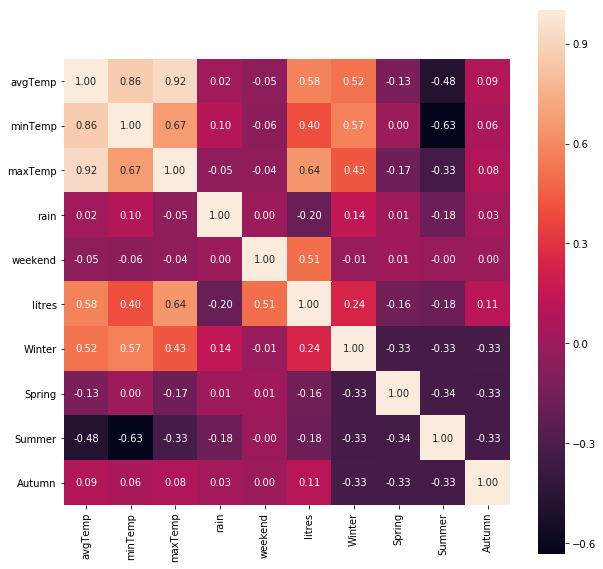

In [11]:
dataframe = ml_handler.source
plot_correlation(dataframe, dataframe.columns)

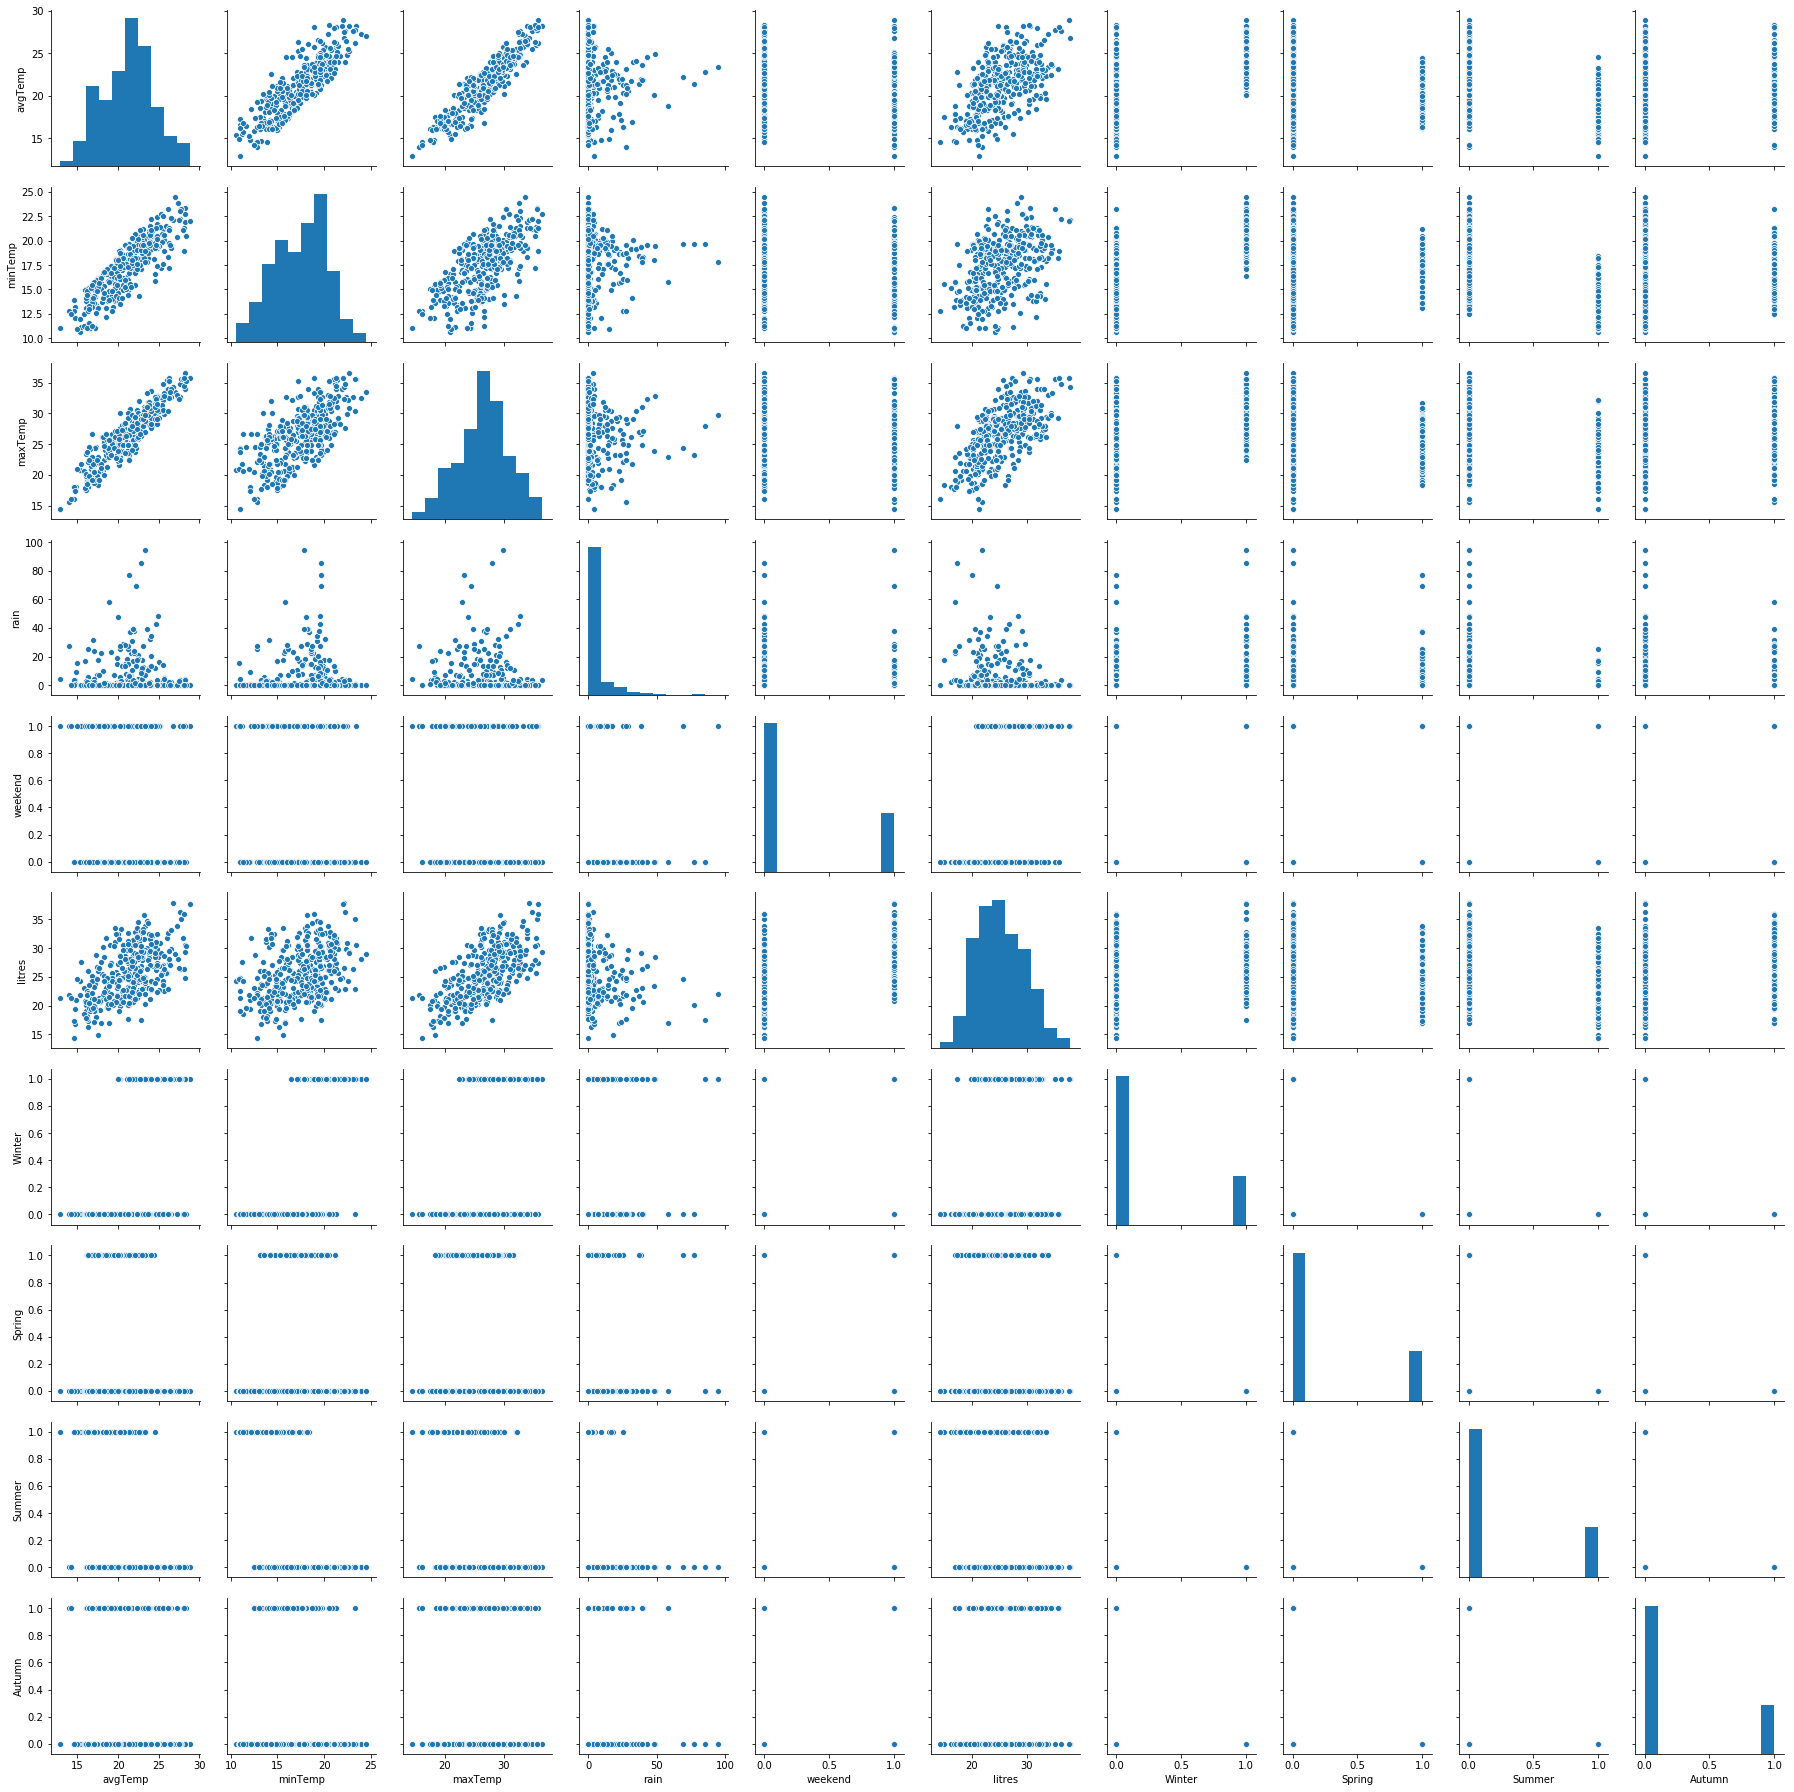

In [12]:
sb.pairplot(dataframe)

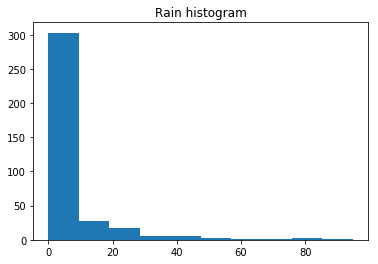

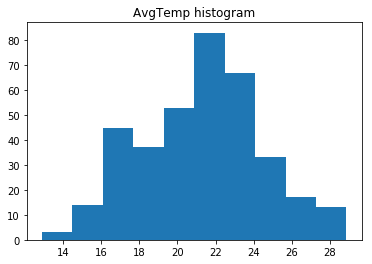

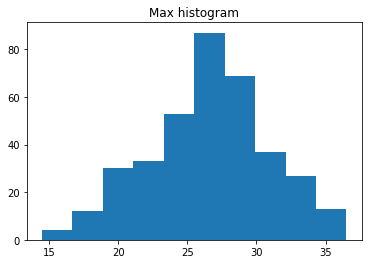

In [13]:
plt.hist(dataframe['rain'])
plt.title("Rain histogram")
plt.show()
plt.hist(dataframe['avgTemp'])
plt.title("AvgTemp histogram")
plt.show()
plt.hist(dataframe['maxTemp'])
plt.title("Max histogram")
plt.show()

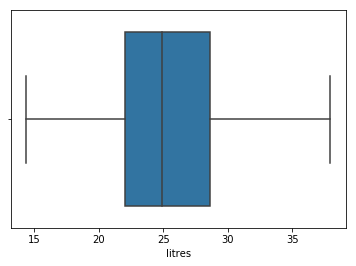

In [14]:
sb.boxplot(x=dataframe['litres'])

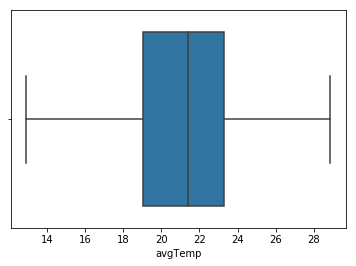

In [15]:
sb.boxplot(x=dataframe['avgTemp'])

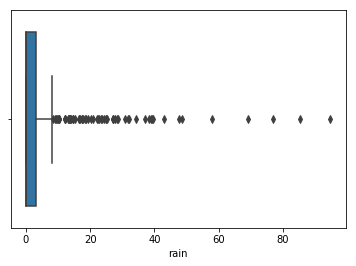

In [16]:
sb.boxplot(x=dataframe['rain'])

In [17]:
dataframe = dataframe[dataframe.rain < 80]

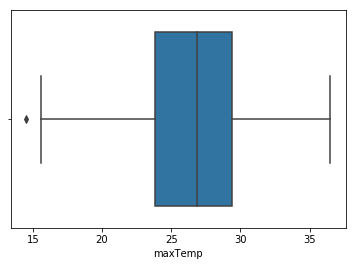

In [18]:
sb.boxplot(x=dataframe['maxTemp'])

In [19]:
dataframe = dataframe[dataframe.maxTemp > 15]

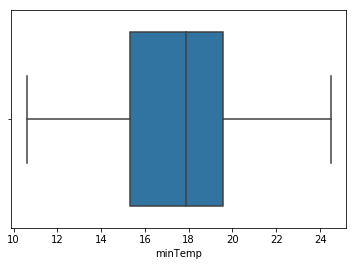

In [20]:
sb.boxplot(x=dataframe['minTemp'])

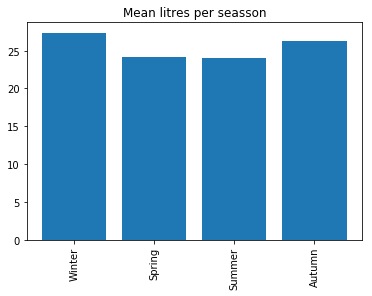

In [21]:
values = []
    
for i in season:
    values.append(dataframe[dataframe[i] == 1].litres.mean())
    
plt.bar(season, values)
plt.title('Mean litres per seasson')
plt.xticks(rotation=90)
plt.show()

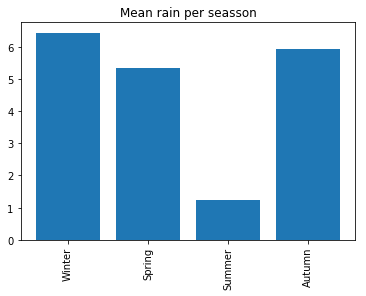

In [22]:
values = []
    
for i in season:
    values.append(dataframe[dataframe[i] == 1].rain.mean())
    
plt.bar(season, values)
plt.title('Mean rain per seasson')
plt.xticks(rotation=90)
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [24]:
def show_metrics(model, X_train, X_test, y_train, y_test):
    y_train_hat = model.predict(X_train)
    y_test_hat = model.predict(X_test)
    print("Train set")
    print("\tR2", r2_score(y_train, y_train_hat))
    print("\tMSE", mean_squared_error(y_train, y_train_hat))
    print("\tMAE", mean_absolute_error(y_train, y_train_hat))
    print("Test set")
    print("\tR2", r2_score(y_test, y_test_hat))
    print("\tMSE", mean_squared_error(y_test, y_test_hat))
    print("\tMAE", mean_absolute_error(y_test, y_test_hat))

In [25]:
# dataframe.drop(['Winter', 'Spring', 'Summer', 'Autumn'], axis=1, inplace=True)
from copy import copy

tmp = copy(dataframe)
dataframe.drop(['minTemp', 'avgTemp'], axis=1, inplace=True)

In [26]:
X = dataframe.drop('litres', axis=1)
Y = dataframe.litres

In [27]:
rs = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))
X_scaled = rs.fit_transform(X)

In [28]:
X_scaled

array([[ 1.0044843 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.1838565 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53811659,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.50224215,  3.43333333,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.80717489,  2.1       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37668161,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, shuffle = True, random_state = 42)

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
show_metrics(lin_reg,X_train, X_test, y_train, y_test)

Train set
	R2 0.7359908267950238
	MSE 4.731340685263929
	MAE 1.7932337881476166
Test set
	R2 0.721550397474815
	MSE 6.098851720795977
	MAE 2.090566313285982


In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train, y_train)
show_metrics(lasso,X_train, X_test, y_train, y_test)

Train set
	R2 0.7359908148011951
	MSE 4.731340900206802
	MAE 1.7932634217325008
Test set
	R2 0.7215472130577504
	MSE 6.098921468740735
	MAE 2.0906094223923812


D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.0001)
ridge.fit(X_train, y_train)
show_metrics(ridge,X_train, X_test, y_train, y_test)

Train set
	R2 0.7359908267935988
	MSE 4.731340685289465
	MAE 1.7932337408301469
Test set
	R2 0.721550242826255
	MSE 6.098855108046768
	MAE 2.0905669830551563


In [33]:
from sklearn.linear_model import ElasticNet


elastic = ElasticNet(alpha = 0.00001)
elastic.fit(X_train, y_train)
show_metrics(elastic,X_train, X_test, y_train, y_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Train set
	R2 0.7359908264198961
	MSE 4.731340691986639
	MAE 1.7932345595913817
Test set
	R2 0.7215482555355661
	MSE 6.098898635461166
	MAE 2.0905769366221874


In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt_reg = GradientBoostingRegressor(max_depth=40, n_estimators=1000, learning_rate=0.01, random_state=42)

gbrt_reg.fit(X_train, y_train)
show_metrics(gbrt_reg,X_train, X_test, y_train, y_test)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Train set
	R2 0.9904592672371345
	MSE 0.17098063881715647
	MAE 0.11292064597994862
Test set
	R2 0.5103494902059045
	MSE 10.724762496208788
	MAE 2.66343399813542


In [35]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(alpha = 0.001, max_iter = 10000000, tol = 0.01, shuffle = True, random_state = 2)

sgd_reg.fit(X_train, y_train)
show_metrics(sgd_reg,X_train, X_test, y_train, y_test)

Train set
	R2 0.7303653677211505
	MSE 4.8321552254043185
	MAE 1.781022089965225
Test set
	R2 0.720316070225212
	MSE 6.125887057898268
	MAE 2.0649863189796935


In [36]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

xg_reg.fit(X_train, y_train)
show_metrics(xg_reg,X_train, X_test, y_train, y_test)

Train set
	R2 0.984760387129412
	MSE 0.2731109662856425
	MAE 0.30914747713595425
Test set
	R2 0.5652163687585439
	MSE 9.52301915148556
	MAE 2.553690473784001


In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

rf_reg.fit(X_train, y_train)
show_metrics(rf_reg,X_train, X_test, y_train, y_test)

Train set
	R2 0.9307467035092152
	MSE 1.2410967971218967
	MAE 0.8604058057862898
Test set
	R2 0.6319966432146473
	MSE 8.060337976550155
	MAE 2.332258021236362


The best score we get from Lasso

R2 = 0.7412168772585577

MSE = 5.71117456151812

MAE = 1.968700531423183

In [41]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
log_reg.fit(X_train, y_train)
show_metrics(log_reg,X_train, X_test, y_train, y_test)

ValueError: Unknown label type: 'continuous'